# KNN Classification for NBA data
#### Rus Adamovics, Ryan Moore, Howard Liu

In [8]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline  

In [9]:
# https://www.nbastuffer.com/2016-2017-nba-regular-season-player-stats/
# https://www.nbastuffer.com/2017-2018-nba-player-stats
nba = pd.read_csv('NBA_Player_Stats_16-17.csv', encoding = "ISO-8859-1")
nba = pd.DataFrame(nba)

# Normalize quantitative variables
cols_to_norm = nba.columns[5:]
nba[cols_to_norm] = nba[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#random_state=nba.shape[0]
train = nba.sample(frac=0.7)
train = pd.DataFrame(train)

test = nba.drop(train.index)
test = pd.DataFrame(test)

list_of_players = np.array(nba.iloc[0:]["Player"])
list_of_players_test = np.array(test.iloc[0:]["Player"])
list_of_players_train = np.array(train.iloc[0:]["Player"]) 
nba

,Player,Team,Pos,Pos_Num,Class,Age,GP,MPG,MIN_PERC,USG_PERC,...,3P_PERC,TS_PERC,PPG,RPG,TRB_PERC,APG,AST_PERC,SPG,BPG,VI
0,Aaron Brooks,Ind,PG,1,FrontCourt,0.619048,0.7875,0.265244,0.266471,0.362606,...,0.562219,0.634543,0.158228,0.078014,0.170635,0.169643,0.361257,0.187192,0.053030,0.363636
1,Aaron Gordon,Orl,SF,3,BackCourt,0.095238,0.9750,0.722561,0.723280,0.388102,...,0.431784,0.663329,0.401899,0.361702,0.380952,0.169643,0.183246,0.399015,0.189394,0.392045
2,Adreian Payne,Min,PF,4,BackCourt,0.285714,0.2000,0.076220,0.077599,0.470255,...,0.299850,0.632040,0.110759,0.127660,0.563492,0.035714,0.139616,0.216749,0.147727,0.414773
3,AJ Hammons,Dal,C,5,BackCourt,0.238095,0.2500,0.073171,0.074671,0.317280,...,0.749625,0.590738,0.069620,0.120567,0.523810,0.017857,0.066318,0.024631,0.223485,0.278409
4,Al Horford,Bos,C,5,BackCourt,0.523810,0.8250,0.832317,0.831625,0.376771,...,0.532234,0.692115,0.443038,0.482270,0.468254,0.446429,0.425829,0.374384,0.477273,0.551136
5,Al Jefferson,Ind,C,5,BackCourt,0.619048,0.8000,0.277439,0.278184,0.558074,...,0.000000,0.658323,0.256329,0.297872,0.666667,0.080357,0.191972,0.142857,0.090909,0.505682
6,Alan Anderson,Lac,SF,3,BackCourt,0.714286,0.3500,0.161585,0.161054,0.206799,...,0.476762,0.618273,0.091772,0.056738,0.174603,0.035714,0.085515,0.049261,0.000000,0.215909
7,Alan Williams,Pho,PF,4,BackCourt,0.238095,0.5625,0.307927,0.307467,0.410765,...,0.000000,0.684606,0.234177,0.439716,0.884921,0.044643,0.090750,0.280788,0.257576,0.426136
8,Alec Burks,Uta,SG,2,FrontCourt,0.285714,0.5000,0.323171,0.322108,0.461756,...,0.493253,0.627034,0.212025,0.205674,0.420635,0.062500,0.130890,0.211823,0.045455,0.346591
9,Alex Abrines,Okc,SG,2,FrontCourt,0.190476,0.8250,0.320122,0.320644,0.269122,...,0.571214,0.700876,0.189873,0.092199,0.178571,0.053571,0.095986,0.266010,0.049242,0.244318


In [10]:
# Function returns tuple (actual distance from player 1, player 2 name)
def EuclidianDistance(Player_1, Player_2, data_set):
    player1 = data_set.loc[data_set['Player'] == Player_1]
    player2 = data_set.loc[data_set['Player'] == Player_2]
    distance = math.sqrt(sum(player1.iloc[0][5:25] - player2.iloc[0][5:25])**2)
    return distance, player2.iloc[0][0]

In [11]:
# itertate through all players and compare to Russell Westbrook. Store tuple of distances, player names 
def ClosestPlayersTo(Player_Name):
    distances = ()
    for i in range(len(list_of_players)):
        distances = distances + EuclidianDistance(Player_Name, list_of_players[i], nba)

    # convert stored tuples of distances and players into seperate numpy arrays and 
    # combine into pandas data frame and sort by dist.
    dist = []
    for i in range(0,len(distances), 2):
        dist.append(distances[i])
    dist = np.array(dist)
    players = []
    for i in range(1, len(distances), 2):
        players.append(distances[i])
    players = np.array(players)
    data = pd.DataFrame({'Distances':dist, 'Players':players})
    data = data.sort_values('Distances')
    return data.iloc[1:10]

In [19]:
###### Question 1
ClosestPlayersTo("Russell Westbrook")

,Distances,Players
175,0.604736,James Harden
270,1.887375,LeBron James
209,2.315093,John Wall
27,2.481884,Anthony Davis
145,2.600688,Giannis Antetokounmp
100,2.621476,DeMarcus Cousins
398,2.755040,Stephen Curry
236,3.015687,Karl-Anthony Towns
198,3.052168,Jimmy Butler


## For our first question, we wanted to find which player from the 2016-2017 regular season is closest to Russell Westbrook (2016-2017 NBA Regular Season MVP). James Harden finished second in last year's NBA MVP race which makes sense that his statistical metrics are the closest to Russell Westbrook's numbers

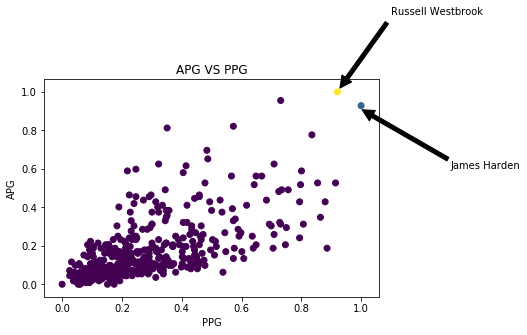

In [102]:
nba['Player2'] = 1
nba.loc[(nba['Player'] == 'Russell Westbrook'), 'Player2'] = 2
nba.loc[(nba['Player'] == 'James Harden'), 'Player2'] = 4
plt.scatter(nba['PPG'], nba['APG'], c = nba['Player2'])
plt.xlabel("PPG")
plt.ylabel("APG")
plt.title("")
plt.annotate('Russell Westbrook', xy=(0.92, 1), xytext=(1.1, 1.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('James Harden', xy=(1, 0.91), xytext=(1.3, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
plt.title("APG VS PPG")
plt.show()
nba = nba.drop('Player2', 1)

##  Question 2, KNN Algorithm to classify NBA Positions (PG, SG, SF, PF, C) based on quantitative metrics for offense and defense. 

In [12]:
# Function returns actual distance from player 1, player 2
def EuclidianDistance_KNN(Player_1, Player_2):
    player1 = train.loc[train['Player'] == Player_1]                
    player2 = test.loc[test['Player'] == Player_2]
    distance = math.sqrt(sum(player1.iloc[0][5:25] - player2.iloc[0][5:25])**2)
    return distance

In [13]:
# gets neighbors for only 1 observation in test set
import operator
def getNeighbors(train_set, Test_Player, k):
    distances = []
    for x in range(len(train_set)):
        dist = EuclidianDistance_KNN(str(train_set.iloc[x][0]), Test_Player)
        distances.append((train_set.iloc[x][0], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [14]:
# Get ALL Top K Neighbors for each observation in test set
def getALLNeighbors(train_set, k):
    neighbors_array = []
    for i in range(len(test)):
        neighbors_array.append(getNeighbors(train, list_of_players_test[i], k))
    return neighbors_array

In [15]:
# Resize 1d list into mutlidimensional list
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

In [16]:
def GetLabels(neighbors_array, k):
    labels_train = []
    for i in range(len(neighbors_array)):
        for j in range(len(neighbors_array[i])):
            player = train.loc[train['Player'] == neighbors_array[i][j]]
            labels_train.append(player.iloc[0][3])

    labels_train = to_matrix(labels_train, k)
    labels_train = np.array(labels_train)

    labels_test = []
    for i in list_of_players_test:
        player = test.loc[test['Player'] == i] 
        label = player.iloc[0][3]
        labels_test.append(label)
    labels_test = np.array(labels_test)
    return labels_train, labels_test

In [17]:
import operator
def getResponse(neighbors_arrar):
    answer = []
    for x in range(len(neighbors_array)):
        classVotes = {}
        for i in range(len(neighbors_array[x])):
            player = train.loc[train['Player'] == neighbors_array[x][i]]
            response = player.iloc[0][3]
            if response in classVotes:
                classVotes[response] += 1
            else: 
                classVotes[response] = 1
        np.array(answer.append(classVotes))
    sortedValues = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return answer

In [18]:
def Accuracy(predictions, actual):
    N = len(predictions)
    count = 0
    for i in range(len(predictions)):
        if abs(actual[i] - predictions[i]) <= 1:
            count = count + 1
    return count / N

In [26]:
# Iterate through k-values and see how accuracy changes, testing for k = 1 to 20 for 5 different train, test sets

cross_validation = []
for j in range(5):
    nba = pd.read_csv('NBA_Player_Stats_16-17.csv', encoding = "ISO-8859-1")
    nba = pd.DataFrame(nba)

    # Normalize quantitative variables
    cols_to_norm = nba.columns[5:]
    nba[cols_to_norm] = nba[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    #random_state=nba.shape[0]
    train = nba.sample(frac=0.7)
    train = pd.DataFrame(train)

    test = nba.drop(train.index)
    test = pd.DataFrame(test)

    list_of_players = np.array(nba.iloc[0:]["Player"])
    list_of_players_test = np.array(test.iloc[0:]["Player"])
    list_of_players_train = np.array(train.iloc[0:]["Player"])
    
    accuracies = []
    for i in range(1,21):
        print(i)
        neighbors_array = getALLNeighbors(train, i)
        knn_labels, true_labels = GetLabels(neighbors_array, i)
        answer = getResponse(neighbors_array)
        predict = []
        for j in answer:
            np.array(predict.append(max(j.items(), key=operator.itemgetter(1))[0]))
        accuracy = Accuracy(predict, true_labels)
        accuracies.append(accuracy)
    cross_validation.append(accuracies)
print(cross_validation)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[[0.5766423357664233, 0.6496350364963503, 0.5912408759124088, 0.5766423357664233, 0.5547445255474452, 0.583941605839416, 0.5547445255474452, 0.5766423357664233, 0.5547445255474452, 0.5693430656934306, 0.5547445255474452, 0.5547445255474452, 0.5693430656934306, 0.5620437956204379, 0.5766423357664233, 0.5620437956204379, 0.5547445255474452, 0.5182481751824818, 0.5255474452554745, 0.5547445255474452], [0.5912408759124088, 0.5620437956204379, 0.5693430656934306, 0.5693430656934306, 0.5547445255474452, 0.5328467153284672, 0.41605839416058393, 0.49635036496350365, 0.5182481751824818, 0.5255474452554745, 0.583941605839416, 0.5693430656934306, 0.5474452554744526, 0.5401459854014599, 0.5328467153284672, 0.5401459854014599, 0.5182481751824818, 0

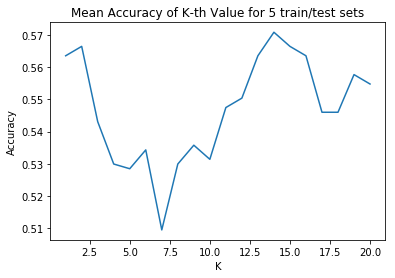

In [36]:
k = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
cross_validation = np.array(cross_validation)
mean_k = np.mean(cross_validation, axis = 0)
plt.plot(k, mean_k)
plt.title("Mean Accuracy of K-th Value for 5 train/test sets")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.show()

In [28]:
cross_validation

array([[ 0.57664234,  0.64963504,  0.59124088,  0.57664234,  0.55474453,
         0.58394161,  0.55474453,  0.57664234,  0.55474453,  0.56934307,
         0.55474453,  0.55474453,  0.56934307,  0.5620438 ,  0.57664234,
         0.5620438 ,  0.55474453,  0.51824818,  0.52554745,  0.55474453],
       [ 0.59124088,  0.5620438 ,  0.56934307,  0.56934307,  0.55474453,
         0.53284672,  0.41605839,  0.49635036,  0.51824818,  0.52554745,
         0.58394161,  0.56934307,  0.54744526,  0.54014599,  0.53284672,
         0.54014599,  0.51824818,  0.54014599,  0.52554745,  0.51094891],
       [ 0.54014599,  0.49635036,  0.48905109,  0.51824818,  0.49635036,
         0.45985401,  0.49635036,  0.51094891,  0.52554745,  0.52554745,
         0.52554745,  0.54744526,  0.54744526,  0.54744526,  0.54014599,
         0.54014599,  0.54744526,  0.51824818,  0.51824818,  0.52554745],
       [ 0.56934307,  0.52554745,  0.52554745,  0.52554745,  0.56934307,
         0.57664234,  0.54014599,  0.52554745,  

In [29]:
mean_k

array([ 0.56350365,  0.56642336,  0.54306569,  0.52992701,  0.52846715,
        0.53430657,  0.50948905,  0.52992701,  0.53576642,  0.53138686,
        0.54744526,  0.55036496,  0.56350365,  0.57080292,  0.56642336,
        0.56350365,  0.5459854 ,  0.5459854 ,  0.55766423,  0.55474453])

In [41]:
# Set K = 17, how does accuracy perform for 50 different train, test sets

cross_validation = []
k = [17]
for j in range(50):
    nba = pd.read_csv('NBA_Player_Stats_16-17.csv', encoding = "ISO-8859-1")
    nba = pd.DataFrame(nba)

    # Normalize quantitative variables
    cols_to_norm = nba.columns[5:]
    nba[cols_to_norm] = nba[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    #random_state=nba.shape[0]
    train = nba.sample(frac=0.7)
    train = pd.DataFrame(train)

    test = nba.drop(train.index)
    test = pd.DataFrame(test)

    list_of_players = np.array(nba.iloc[0:]["Player"])
    list_of_players_test = np.array(test.iloc[0:]["Player"])
    list_of_players_train = np.array(train.iloc[0:]["Player"])
    
    accuracies = []
    for i in k:
        neighbors_array = getALLNeighbors(train, i)
        knn_labels, true_labels = GetLabels(neighbors_array, i)
        answer = getResponse(neighbors_array)
        predict = []
        for j in answer:
            np.array(predict.append(max(j.items(), key=operator.itemgetter(1))[0]))
        accuracy = Accuracy(predict, true_labels)
        accuracies.append(accuracy)
    cross_validation.append(accuracies)
print(cross_validation)

[[0.5182481751824818], [0.5474452554744526], [0.5401459854014599], [0.5693430656934306], [0.5474452554744526], [0.5912408759124088], [0.5255474452554745], [0.5912408759124088], [0.583941605839416], [0.5474452554744526], [0.49635036496350365], [0.5474452554744526], [0.5912408759124088], [0.5620437956204379], [0.5547445255474452], [0.5328467153284672], [0.5912408759124088], [0.5766423357664233], [0.5693430656934306], [0.5401459854014599], [0.5620437956204379], [0.5182481751824818], [0.5620437956204379], [0.6058394160583942], [0.5766423357664233], [0.5693430656934306], [0.5620437956204379], [0.5328467153284672], [0.5474452554744526], [0.5328467153284672], [0.5401459854014599], [0.5766423357664233], [0.6058394160583942], [0.5620437956204379], [0.4744525547445255], [0.6058394160583942], [0.5693430656934306], [0.5693430656934306], [0.5985401459854015], [0.5766423357664233], [0.6277372262773723], [0.6058394160583942], [0.5109489051094891], [0.5036496350364964], [0.5036496350364964], [0.591240

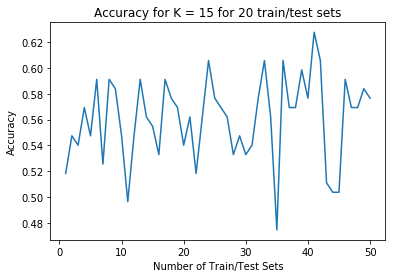

In [45]:
data_sets = np.array(range(1,51)) 
cross_validation = np.array(cross_validation)
plt.plot(data_sets, cross_validation) 
plt.title("Accuracy for K = 15 for 20 train/test sets") 
plt.ylabel("Accuracy") 
plt.xlabel("Number of Train/Test Sets") 
plt.show()

In [44]:
np.mean(cross_validation)

0.5602919708029197